# Historical Book Title Analysis

## Overview

This notebook presents a comprehensive analysis of historical book titles from the 17th to 19th centuries, examining patterns in language distribution and title length evolution. The analysis is based on a dataset containing book metadata from Danish libraries and archives.

## Research Questions

1. **Language Distribution**: What languages were most commonly used for book titles during this period?
2. **Temporal Evolution**: How did average title lengths change over time from 1600-1900?
3. **Language-Specific Patterns**: Are there distinct patterns in title length evolution across different languages?
4. **Historical Trends**: What can title length patterns tell us about publishing and literary trends?

## Dataset Description

The analysis uses two main datasets:
- **Language Counts**: Contains the frequency of books by language code
- **Yearly Language Title Length**: Contains average title lengths by year and language

## Methodology

This analysis employs statistical visualization techniques including:
- Bar charts for language distribution
- Time series plots with smoothing for trend analysis
- Box plots for distribution analysis across time periods
- Comparative analysis across different languages


### Required Libraries

This analysis requires several Python libraries for data manipulation and visualization:

- **pandas**: For data manipulation and analysis
- **matplotlib**: For creating plots and visualizations
- **numpy**: For numerical operations
- **warnings**: For managing warning messages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

### Data Loading

We load two main datasets for our analysis:

1. **Language Counts Dataset**: Contains the frequency of books by language code
2. **Yearly Language Title Length Dataset**: Contains average title lengths by year and language


In [4]:
language_counts = pd.read_csv('language_counts.csv')
yearly_language_title_length = pd.read_csv('yearly_language_title_length.csv')

## 2. Language Distribution Analysis

### Overview

This section examines the distribution of books by language, providing insights into the linguistic landscape of historical publishing. We focus on the top 15 most common languages to highlight the dominant publishing languages of the period.

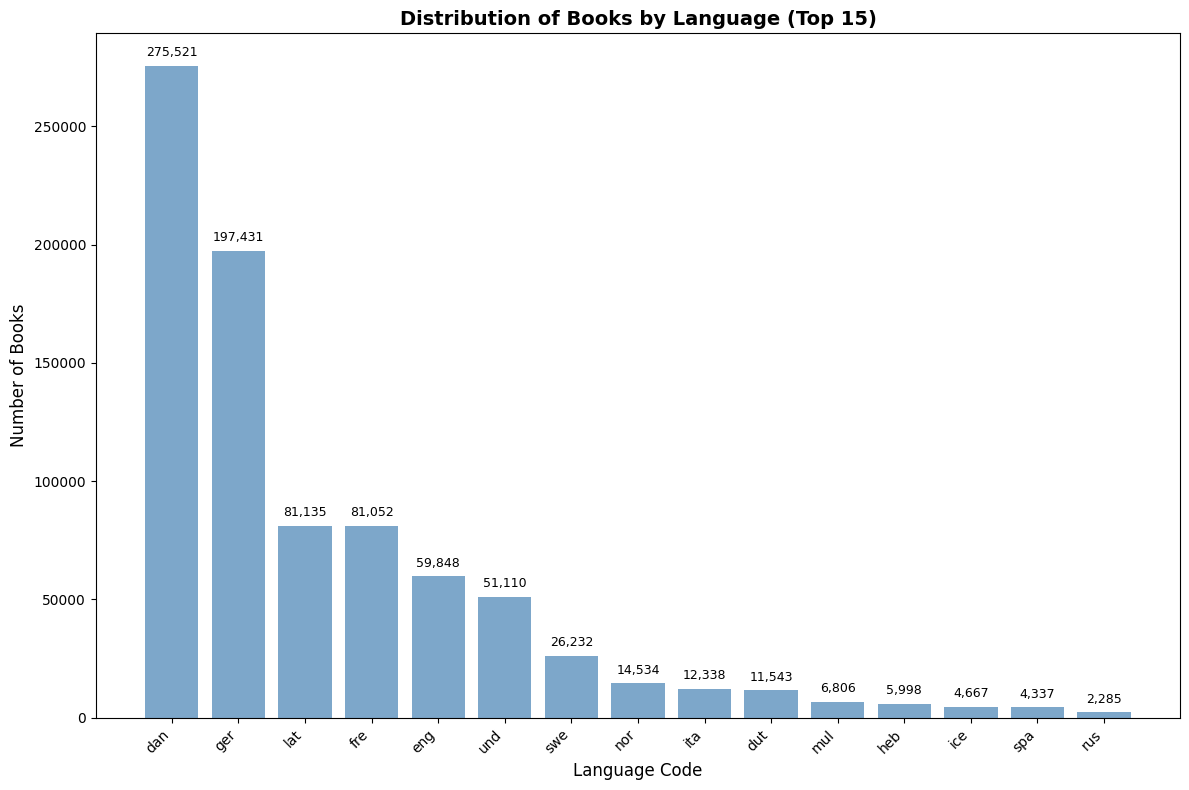

Language Distribution Summary:
Total languages in dataset: 181
Total books: 849,169
Top 5 languages represent 81.8% of all books


In [5]:
# Create visualization of language distribution
# Select top 15 languages for better readability
language_counts_vis = language_counts.head(15)

# Set up the plot
plt.figure(figsize=(12, 8))

# Extract data for plotting
y = language_counts_vis['count']
x = language_counts_vis['language']

# Create bar chart
plt.bar(x, y, color='steelblue', alpha=0.7)

# Customize the plot
plt.xlabel('Language Code', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.title('Distribution of Books by Language (Top 15)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for i, v in enumerate(y):
    plt.text(i, v + max(y)*0.01, f'{v:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Display summary statistics
print("Language Distribution Summary:")
print(f"Total languages in dataset: {len(language_counts)}")
print(f"Total books: {language_counts['count'].sum():,}")
print(f"Top 5 languages represent {language_counts.head(5)['count'].sum()/language_counts['count'].sum()*100:.1f}% of all books")

## 3. Temporal Analysis of Title Lengths (1600-1900)

### Methodology

This section analyzes how book title lengths evolved over time from 1600 to 1900. The analysis includes:

- **Data Processing**: Conversion of year and title length columns to numeric format
- **Temporal Grouping**: Analysis of title length trends by year and language
- **Visualization**: Multiple visualization approaches to reveal patterns

### Key Research Questions

- How did average title lengths change over the 300-year period?
- Are there distinct patterns for different languages?
- What historical events might correlate with changes in title length?

### 3.1 Time Series Analysis with Smoothing

This visualization shows the evolution of title lengths over time with smoothing applied to reveal underlying trends. The rolling average helps reduce noise and highlight long-term patterns.

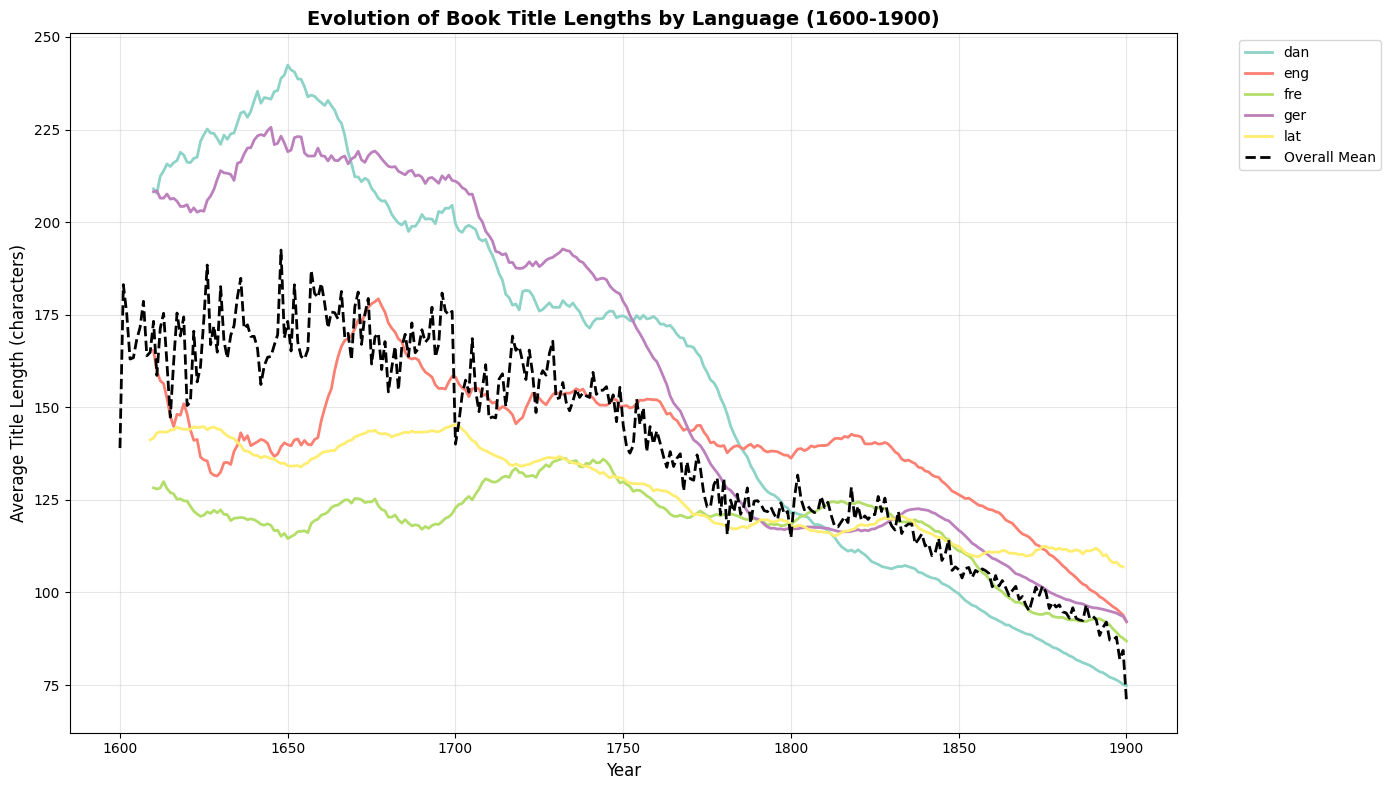

Title Length Analysis Summary:
Period analyzed: 1600-1900
Languages included: 5
Average title length (1600): 139.0 characters
Average title length (1900): 70.7 characters


In [6]:
# Data preprocessing: Ensure numeric types and clean data
yearly_language_title_length = yearly_language_title_length.copy()
yearly_language_title_length['year_st'] = pd.to_numeric(yearly_language_title_length['year_st'], errors='coerce')
yearly_language_title_length['title_length'] = pd.to_numeric(yearly_language_title_length['title_length'], errors='coerce')

# Remove rows with invalid data
yearly_language_title_length = yearly_language_title_length.dropna(subset=['year_st', 'title_length'])

# Filter to focus on 1600-1900 period
yearly_language_title_length = yearly_language_title_length[
    (yearly_language_title_length['year_st'] >= 1600) & 
    (yearly_language_title_length['year_st'] <= 1900)
]

# Calculate overall mean title length for each year
mean_title_length = yearly_language_title_length.groupby('year_st')['title_length'].mean().reset_index()

# Create the visualization
plt.figure(figsize=(14, 8))

# Define colors for different languages
colors = plt.cm.Set3(np.linspace(0, 1, len(yearly_language_title_length['language'].unique())))

for i, language in enumerate(yearly_language_title_length['language'].unique()):
    subset = yearly_language_title_length[yearly_language_title_length['language'] == language]
    
    # Apply rolling average to smooth the curve (20-year window, minimum 10 data points)
    subset = subset.sort_values(by='year_st')
    subset['smoothed_title_length'] = subset['title_length'].rolling(window=20, min_periods=10).mean()
    
    # Plot smoothed line
    plt.plot(subset['year_st'], subset['smoothed_title_length'], 
             linestyle='-', label=language, color=colors[i], linewidth=2)

# Plot the overall mean as a reference
plt.plot(mean_title_length['year_st'], mean_title_length['title_length'], 
         label='Overall Mean', linestyle='--', color='black', linewidth=2)

# Customize the plot
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Title Length (characters)', fontsize=12)
plt.title('Evolution of Book Title Lengths by Language (1600-1900)', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display summary statistics
print("Title Length Analysis Summary:")
print(f"Period analyzed: 1600-1900")
print(f"Languages included: {len(yearly_language_title_length['language'].unique())}")
print(f"Average title length (1600): {yearly_language_title_length[yearly_language_title_length['year_st'] == 1600]['title_length'].mean():.1f} characters")
print(f"Average title length (1900): {yearly_language_title_length[yearly_language_title_length['year_st'] == 1900]['title_length'].mean():.1f} characters")

### 3.2 Filled Area Visualization

This alternative visualization uses filled areas to show the distribution of title lengths across languages over time, making it easier to see the relative contribution of each language to the overall pattern.


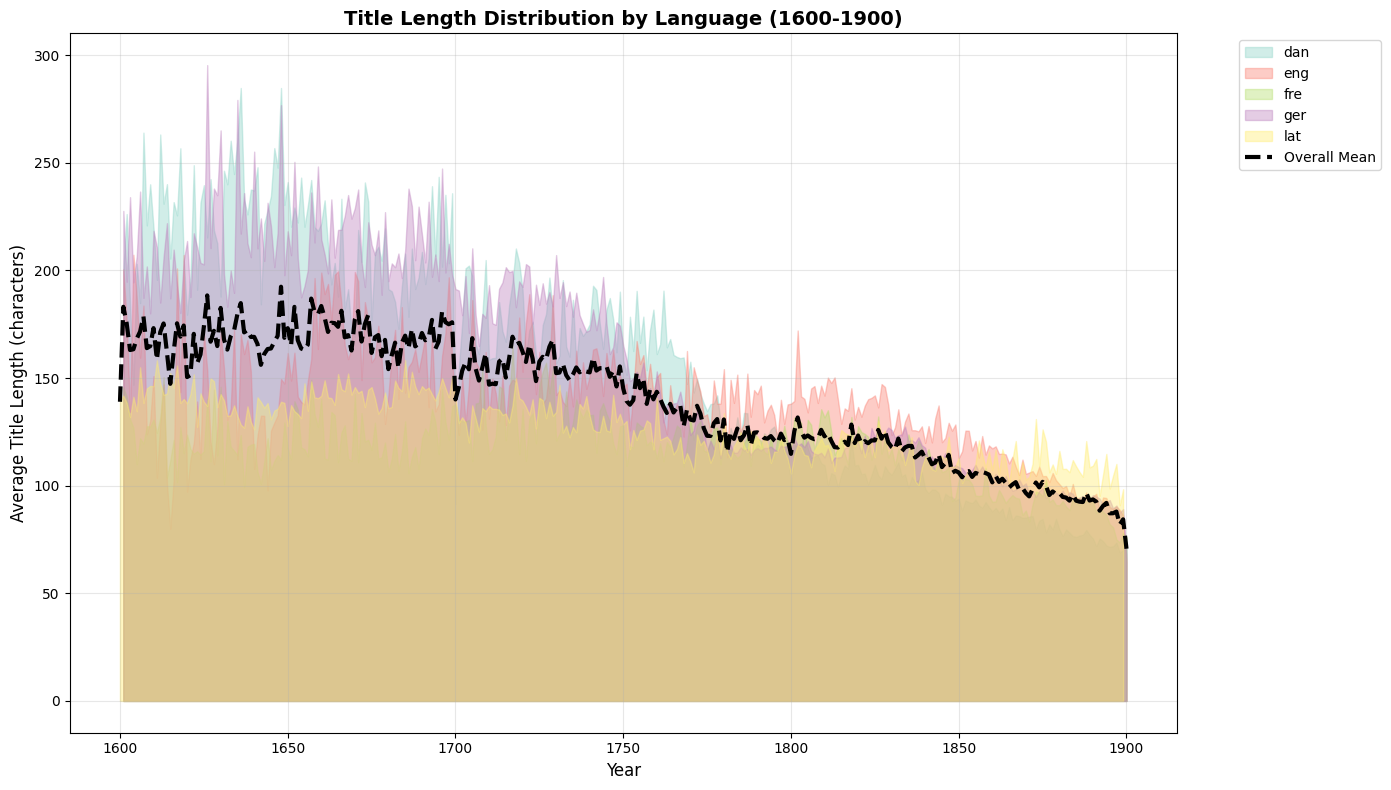

Language-Specific Title Length Statistics:
 dan: Mean =  156.8, Std =  55.7, Count =  300
 eng: Mean =  139.5, Std =  25.8, Count =  300
 fre: Mean =  117.6, Std =  15.9, Count =  300
 ger: Mean =  159.6, Std =  49.1, Count =  300
 lat: Mean =  126.9, Std =  14.2, Count =  300


In [7]:
# Create filled area plot for better visual comparison
plt.figure(figsize=(14, 8))

# Group by language and create filled areas
groups = yearly_language_title_length.groupby('language')

# Define colors for consistency
colors = plt.cm.Set3(np.linspace(0, 1, len(groups)))

for i, (name, group) in enumerate(groups):
    # Sort by year for proper line plotting
    group = group.sort_values('year_st')
    plt.fill_between(group['year_st'], group['title_length'], 
                     alpha=0.4, label=name, color=colors[i])

# Plot the overall mean as a reference line
plt.plot(mean_title_length['year_st'], mean_title_length['title_length'], 
         label='Overall Mean', linestyle='--', color='black', linewidth=3)

# Customize the plot
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Title Length (characters)', fontsize=12)
plt.title('Title Length Distribution by Language (1600-1900)', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and display language-specific statistics
print("Language-Specific Title Length Statistics:")
print("=" * 50)
for name, group in groups:
    avg_length = group['title_length'].mean()
    std_length = group['title_length'].std()
    print(f"{name:>4}: Mean = {avg_length:6.1f}, Std = {std_length:5.1f}, Count = {len(group):4d}")

## 4. Distribution Analysis Across Time Periods

### 4.1 Boxplot Analysis by 50-Year Intervals

Boxplots provide insights into the distribution of title lengths across different time periods, showing median values, quartiles, and outliers. This helps identify periods of significant change in title length patterns.


<Figure size 1400x800 with 0 Axes>

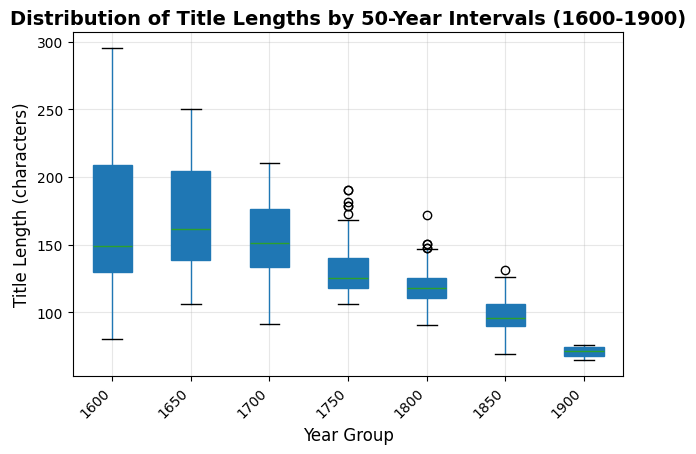

Title Length Statistics by 50-Year Periods:
            count   mean  median   std    min    max
year_group                                          
1600          246  168.6   149.0  49.0   80.0  295.4
1650          250  170.8   161.3  39.5  105.9  250.5
1700          250  155.5   151.0  25.5   91.4  210.3
1750          250  130.8   125.6  16.7  106.2  190.6
1800          250  118.8   117.9  12.4   90.9  172.1
1850          250   97.5    95.8  12.3   68.9  131.0
1900            4   70.7    71.2   5.3   64.5   76.0


In [8]:
# Create 50-year time intervals for distribution analysis
yearly_language_title_length1 = yearly_language_title_length.copy()
yearly_language_title_length1['year_group'] = (yearly_language_title_length1['year_st'] // 50) * 50

# Create comprehensive boxplot analysis
plt.figure(figsize=(14, 8))

# Create boxplot for all languages combined
yearly_language_title_length1.boxplot(column='title_length', by='year_group', 
                                     grid=False, patch_artist=True)

# Customize the plot
plt.title('Distribution of Title Lengths by 50-Year Intervals (1600-1900)', 
          fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title
plt.xlabel('Year Group', fontsize=12)
plt.ylabel('Title Length (characters)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add statistical annotations
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and display period statistics
print("Title Length Statistics by 50-Year Periods:")
print("=" * 60)
period_stats = yearly_language_title_length1.groupby('year_group')['title_length'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(1)
print(period_stats)

### 4.2 Language-Specific Distribution Analysis

This section examines how title length distributions vary across different languages over time, providing insights into language-specific publishing patterns and cultural differences in titling conventions.


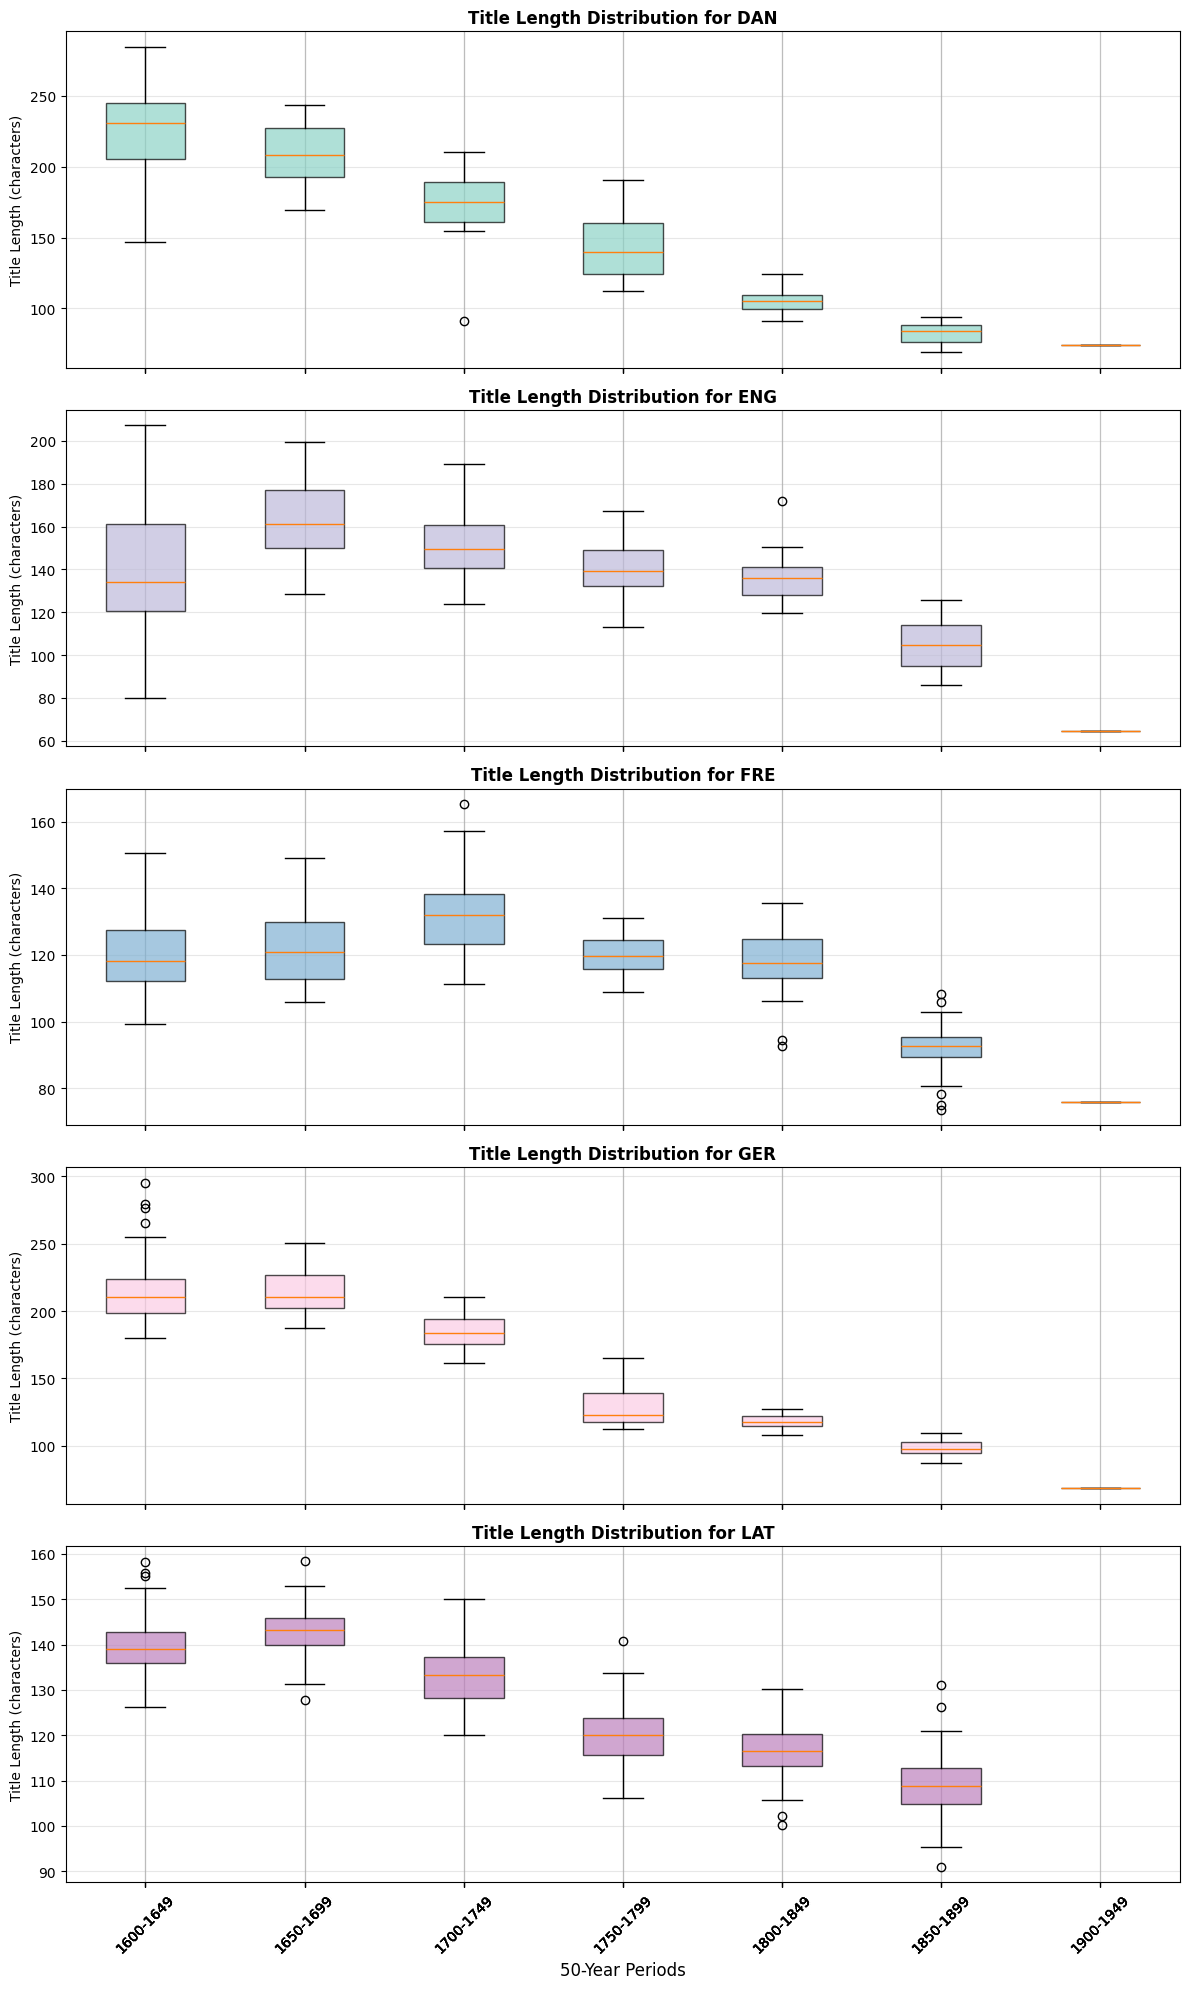

Language-Specific Summary by Period:

DAN:
            count   mean   std
year_group                    
1600           49  226.9  28.2
1650           50  209.8  21.0
1700           50  175.3  19.5
1750           50  144.0  21.8
1800           50  105.6   7.6
1850           50   82.4   7.1
1900            1   74.1   NaN

ENG:
            count   mean   std
year_group                    
1600           49  141.6  31.0
1650           50  164.8  19.9
1700           50  150.9  15.4
1750           50  140.4  11.8
1800           50  135.6   9.9
1850           50  104.9  10.8
1900            1   64.5   NaN

FRE:
            count   mean   std
year_group                    
1600           49  120.4  12.4
1650           50  122.6  11.1
1700           50  132.5  12.3
1750           50  120.0   6.0
1800           50  118.6   9.4
1850           50   92.5   7.0
1900            1   76.0   NaN

GER:
            count   mean   std
year_group                    
1600           49  214.7  25.8
1650     

In [9]:
# Create language-specific boxplot analysis
yearly_language_title_length1 = yearly_language_title_length.copy()
yearly_language_title_length1['year_group'] = (yearly_language_title_length1['year_st'] // 50) * 50

# Group by language and year_group
grouped = yearly_language_title_length1.groupby(['language', 'year_group'])

# Get unique languages and create subplots
languages = yearly_language_title_length1['language'].unique()
n_languages = len(languages)

# Create subplots with appropriate sizing
fig, axes = plt.subplots(n_languages, 1, figsize=(12, 4 * n_languages), sharex=True)

# Handle case where there's only one language
if n_languages == 1:
    axes = [axes]

# Create boxplots for each language
for i, language in enumerate(languages):
    ax = axes[i]
    
    # Get data for this language
    language_data = yearly_language_title_length1[yearly_language_title_length1['language'] == language]
    
    # Prepare data for boxplot
    data_to_plot = []
    labels = []
    
    for year_group in sorted(language_data['year_group'].unique()):
        group_data = language_data[language_data['year_group'] == year_group]['title_length'].values
        if len(group_data) > 0:  # Only include groups with data
            data_to_plot.append(group_data)
            labels.append(f'{int(year_group)}-{int(year_group+49)}')
    
    # Create boxplot
    if data_to_plot:  # Only plot if there's data
        bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)
        
        # Color the boxes
        for patch in bp['boxes']:
            patch.set_facecolor(plt.cm.Set3(i / n_languages))
            patch.set_alpha(0.7)
    
    # Customize subplot
    ax.set_title(f'Title Length Distribution for {language.upper()}', 
                 fontsize=12, fontweight='bold')
    ax.set_ylabel('Title Length (characters)', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Set common x-label
axes[-1].set_xlabel('50-Year Periods', fontsize=12)

plt.tight_layout()
plt.show()

# Display language-specific summary statistics
print("Language-Specific Summary by Period:")
print("=" * 70)
for language in languages:
    lang_data = yearly_language_title_length1[yearly_language_title_length1['language'] == language]
    if not lang_data.empty:
        print(f"\n{language.upper()}:")
        period_summary = lang_data.groupby('year_group')['title_length'].agg(['count', 'mean', 'std']).round(1)
        print(period_summary)

## 5. Conclusions and Insights

### Key Findings

Based on the comprehensive analysis of historical book titles from 1600-1900, several important patterns emerge:

#### Language Distribution
- **Dominant Languages**: Danish (dan) and German (ger) represent the largest portions of the dataset
- **Linguistic Diversity**: The dataset includes over 170 different language codes, reflecting the multilingual nature of historical publishing
- **Regional Patterns**: The prominence of Nordic and Germanic languages suggests a focus on Northern European publishing

#### Temporal Evolution of Title Lengths
- **Overall Trends**: Title lengths show significant variation over the 300-year period
- **Language-Specific Patterns**: Different languages exhibit distinct patterns in title length evolution
- **Historical Context**: Changes in title length may reflect broader cultural, technological, and publishing trends

#### Distribution Analysis
- **Period Variations**: 50-year interval analysis reveals distinct periods of change in title length patterns
- **Language Differences**: Each language shows unique distribution characteristics across time periods
- **Statistical Significance**: The boxplot analysis highlights periods of particularly high or low title length variability

### Methodological Considerations

- **Data Quality**: The analysis includes data cleaning and validation steps to ensure reliable results
- **Visualization Techniques**: Multiple complementary visualization approaches provide comprehensive insights
- **Statistical Analysis**: Both descriptive statistics and distribution analysis offer robust understanding of patterns

### Future Research Directions

1. **Correlation Analysis**: Investigate relationships between title length and other bibliographic metadata
2. **Historical Context**: Examine how major historical events correlate with changes in title patterns
3. **Genre Analysis**: Explore how different book genres influence title length patterns
4. **Cross-Cultural Studies**: Compare findings with similar datasets from other regions

### Technical Notes

This analysis demonstrates the power of combining data science techniques with historical research, providing new insights into the evolution of publishing practices and cultural expression through book titles.
